# Basic measurement data pre-processing

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from meas_data_preprocessing import *

## Read data for a selected measurement scenario

In [4]:
infos, measurement_data = read_data(meas_scenario = 13)


file_sizes: 100%|███████████████████████████| 30.5k/30.5k [00:00<00:00, 659kB/s]
Successfully downloaded file to ../datasets/pD7_MH44.DAT

file_sizes: 100%|███████████████████████████| 32.7k/32.7k [00:00<00:00, 773kB/s]
Successfully downloaded file to ../datasets/pD7_MH44r.DAT

file_sizes: 100%|████████████████████████████| 171k/171k [00:00<00:00, 1.85MB/s]
Successfully downloaded file to ../datasets/MW_MH44ReIm.csv
The file ../datasets/pD7_MH44.DAT was read and it contains 2500 data points.
The time increment is 2e-09 s


In [5]:
# metadata for chosen measurement scenario
for key in infos.keys():
    print("%20s: %s" %(key,infos[key]))

                   i: 13
       hydrophonname: GAMPT MH44
     measurementtype: Pulse-Doppler-Mode 7 MHz
     measurementfile: ../datasets/pD7_MH44.DAT
           noisefile: ../datasets/pD7_MH44r.DAT
         hydfilename: ../datasets/MW_MH44ReIm.csv


In [6]:
# available measurement data
for key in measurement_data.keys():
    print("%10s: %s"%(key, type(measurement_data[key])))

      name: <class 'str'>
   voltage: <class 'numpy.ndarray'>
      time: <class 'numpy.ndarray'>


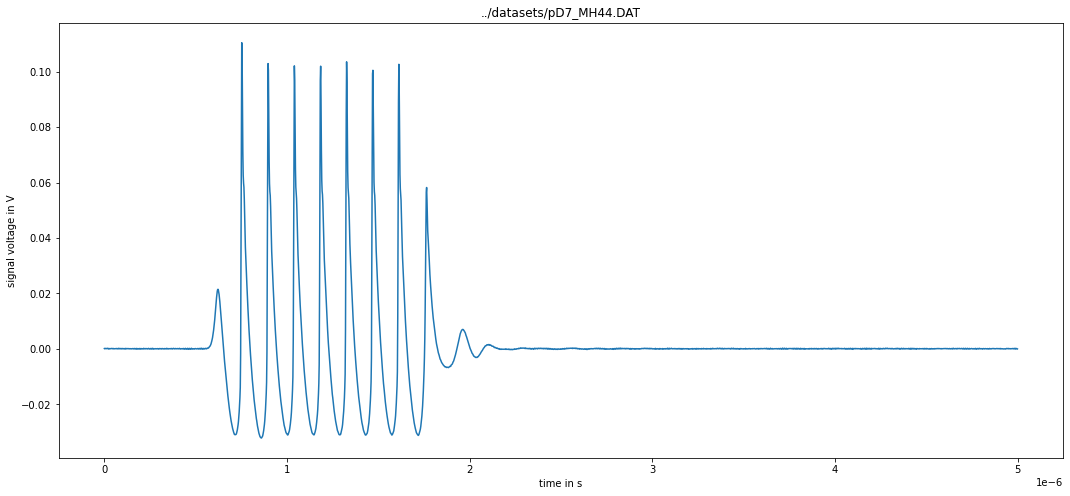

In [7]:
figure(figsize=(18,8))
plot(measurement_data["time"], measurement_data["voltage"])
xlabel("time in s"); ylabel("signal voltage in V")
title(measurement_data["name"]);

## Remove DC component

In [8]:
measurement_data = remove_DC_component(measurement_data)

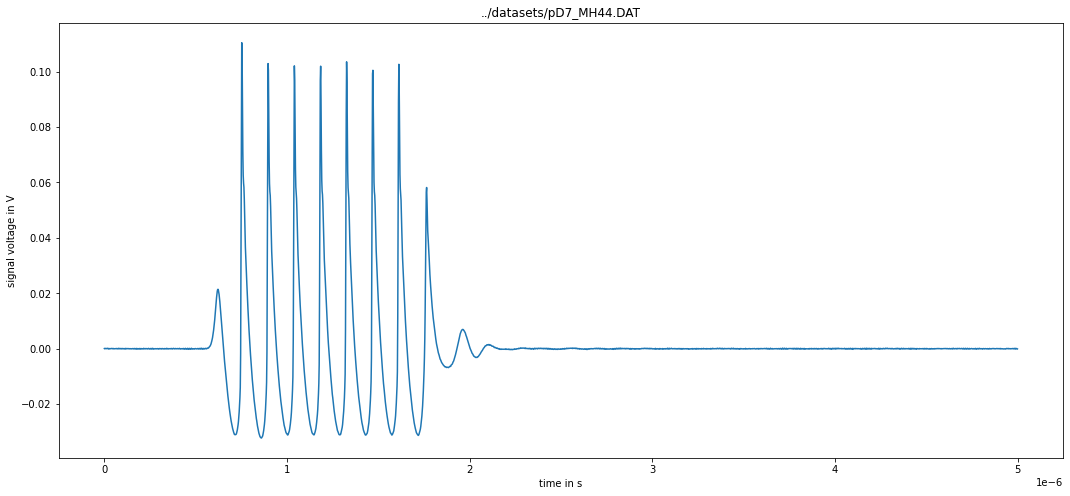

In [9]:
figure(figsize=(18,8))
plot(measurement_data["time"], measurement_data["voltage"])
xlabel("time in s"); ylabel("signal voltage in V")
title(measurement_data["name"]);

## Calculate measurement uncertainty from noise data

In [10]:
measurement_data = uncertainty_from_noisefile(infos, measurement_data, do_plot=False)

The file "../datasets/pD7_MH44r.DAT" was read and it contains 2500 data points


In [11]:
# available measurement data
for key in measurement_data.keys():
    print("%12s: %s"%(key, type(measurement_data[key])))

        name: <class 'str'>
     voltage: <class 'numpy.ndarray'>
        time: <class 'numpy.ndarray'>
 uncertainty: <class 'numpy.ndarray'>


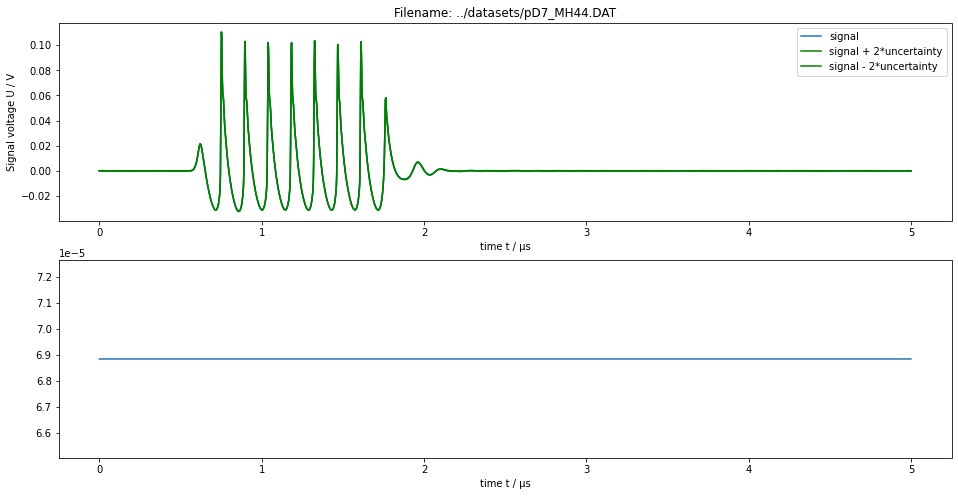

In [12]:
figure(figsize=(16,8))
subplot(211)
plot(measurement_data["time"] / 1e-6, measurement_data["voltage"])
plot(measurement_data["time"] / 1e-6, measurement_data["voltage"] + 2 * measurement_data["uncertainty"], "g")
plot(measurement_data["time"] / 1e-6, measurement_data["voltage"] - 2 * measurement_data["uncertainty"], "g")
legend(["signal", "signal + 2*uncertainty", "signal - 2*uncertainty"])
xlabel("time t / µs")
ylabel("Signal voltage U / V")
title("Filename: {}".format(measurement_data["name"]))

subplot(212)
plot(measurement_data["time"] / 1e-6, measurement_data["uncertainty"])
xlabel("time t / µs");

## Calculate spectrum of measured data

In [13]:
measurement_data = calculate_spectrum(measurement_data, do_plot = False)

In [14]:
# available measurement data
for key in measurement_data.keys():
    print("%12s: %s"%(key, type(measurement_data[key])))

        name: <class 'str'>
     voltage: <class 'numpy.ndarray'>
        time: <class 'numpy.ndarray'>
 uncertainty: <class 'numpy.ndarray'>
   frequency: <class 'numpy.ndarray'>
    spectrum: <class 'numpy.ndarray'>
     varspec: <class 'numpy.ndarray'>


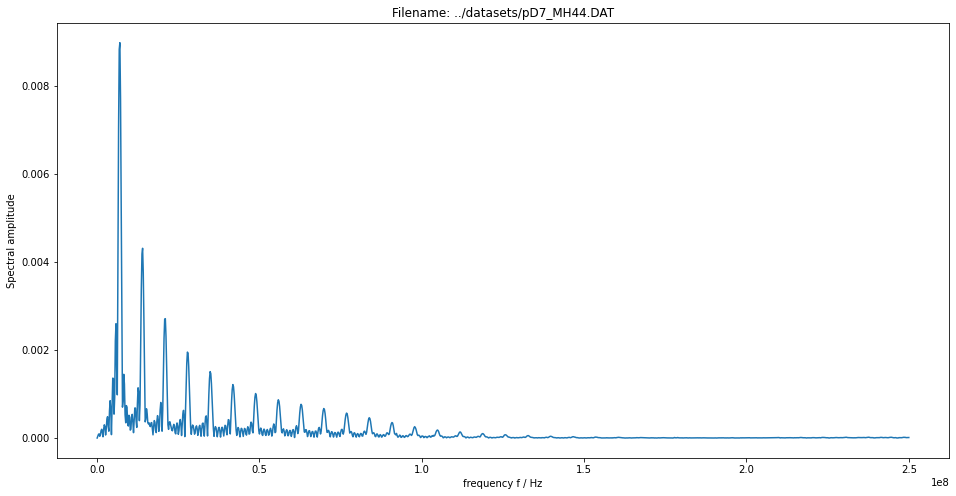

In [15]:
figure(figsize=(16,8))
plot(realpart(measurement_data["frequency"]), amplitude(measurement_data["spectrum"]))
xlabel("frequency f / Hz")
ylabel("Spectral amplitude")
title("Filename: {}".format(measurement_data["name"]));
